Based on the features of the datapoints we can have several groups that can be used to classify the data points. \n
KNN works simply by taking the values of the predicted data points so that they can be used to get into any of the one category
It takes simple euclidean distance of that data points with K nearest data points and then selects the group or category which has more number of less distance lines

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
import pandas as pd

In [6]:
file = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
file['Target'] = iris.target

In [8]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
file['Flower Name'] = file.Target.apply(lambda x : iris.target_names[x])

In [10]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df0 = file[file['Flower Name'] == 'setosa']
df1 = file[file['Flower Name'] == 'versicolor']
df2 = file[file['Flower Name'] == 'verginica']

Text(0, 0.5, 'Sepal Width')

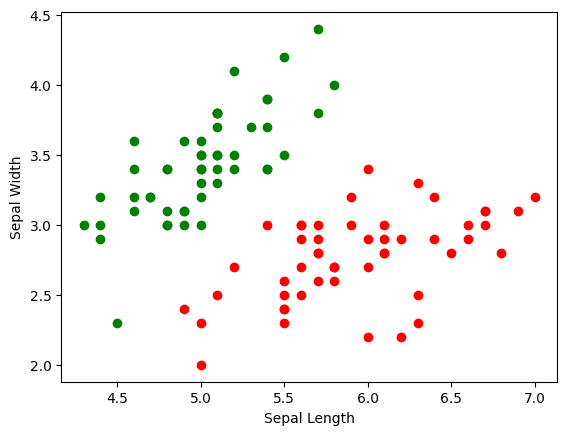

In [33]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

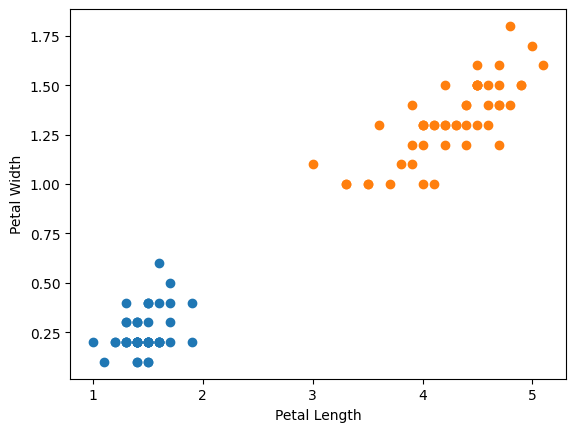

In [35]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [36]:
# From above scatter plot we can conclude that they can be plotted and KNN can be applied

In [37]:
X = file.drop(['Flower Name', 'Target'],axis = 'columns')

In [38]:
Y = file['Flower Name']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [41]:
len(train_X)

120

In [42]:
len(test_X)

30

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model = KNeighborsClassifier(n_neighbors=7)

In [60]:
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=7)

In [61]:
model.score(test_X, test_y)

0.9333333333333333

In [62]:
# here we have got 93% accuracy of the model

In [63]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(test_y, model.predict(test_X))

In [66]:
cm

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  7]], dtype=int64)

In [68]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'True Values')

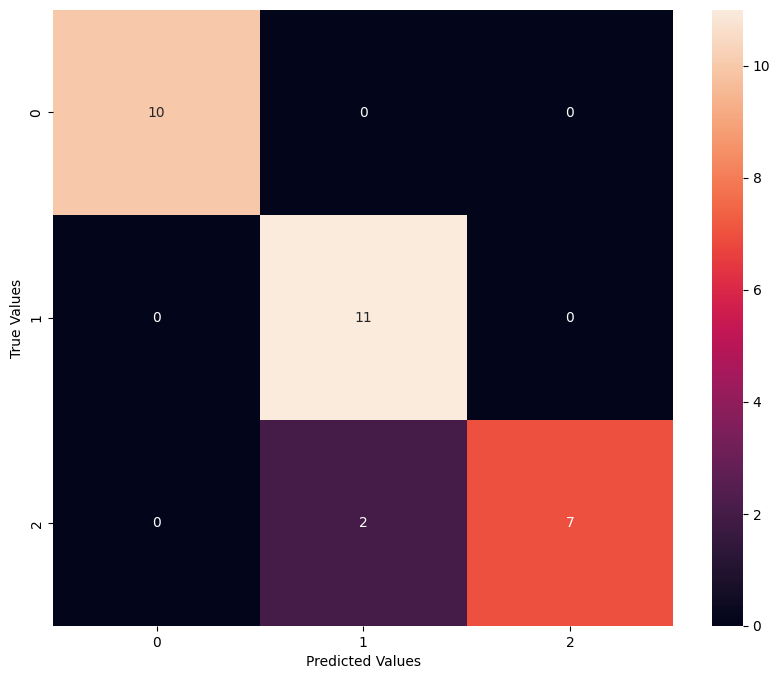

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

In [73]:
from sklearn.metrics import classification_report

In [75]:
report = classification_report(test_y, model.predict(test_X))

In [76]:
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

